# Table of Contents
### 1. Importing Libraries & Data
### 2. Bar Charts
### 3. Histograms & Data Cleaning
### 4. Sampling Data
### 5. Line Charts


# 01. Importing Libraries & Data

In [1]:
# Import Libraries

import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
import seaborn as sns
import scipy

In [2]:
# Creating Path
path = r'/Users/mattwawner/Documents/8-2022-Instacart Basket Analysis'

In [4]:
# Importing df_orders_products_merged
ords_prods_merge = pd.read_pickle(os.path.join(path, '02 Data', 'Prepared Data', 'ords_prods_merge_newcols_48.pkl'))

# 02. Bar Charts

<AxesSubplot:>

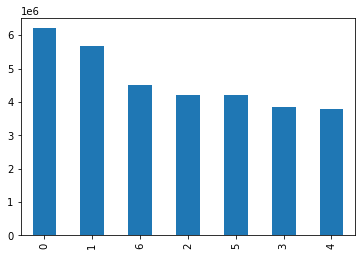

In [5]:
# Create a bar chart

ords_prods_merge['order_day_of_week'].value_counts().plot.bar()

<AxesSubplot:>

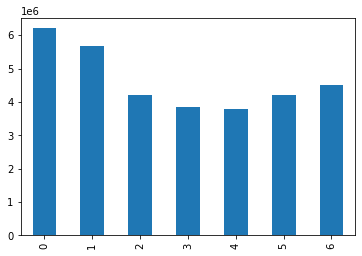

In [6]:
# Create a bar chart with day of week sorted chronologically

ords_prods_merge['order_day_of_week'].value_counts().sort_index().plot.bar()

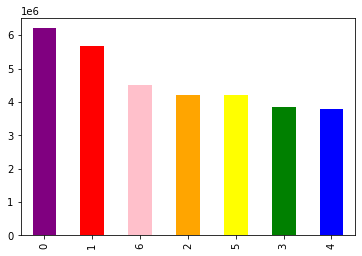

In [7]:
# Saving the bar graph as an object 'bar' so it can be exported

bar = ords_prods_merge['order_day_of_week'].value_counts().plot.bar(color =['purple', 'red', 'pink', 'orange', 'yellow', 'green', 'blue'])

In [11]:
# Exporting the bar graph

bar.figure.savefig(os.path.join(path, '04 Analysis', 'Visualizations', 'bar_orders_dow.png'))

# 03. Histograms & Data Cleaning

<AxesSubplot:ylabel='Frequency'>

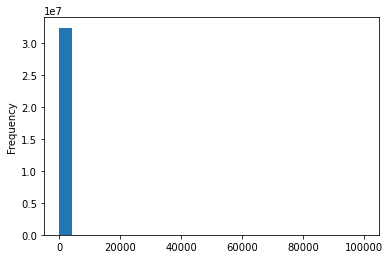

In [12]:
# Creating a histogram of the 'prices' column

ords_prods_merge['prices'].plot.hist(bins=25)

In [13]:
ords_prods_merge['prices'].mean()

11.98004035728261

In [14]:
ords_prods_merge['prices'].median()

7.4

In [15]:
ords_prods_merge['prices'].max()

99999.0

<AxesSubplot:xlabel='prices', ylabel='prices'>

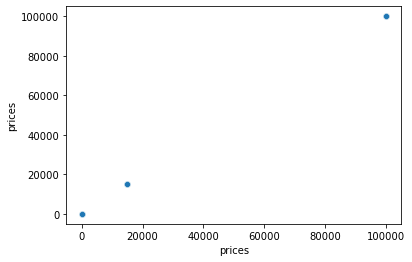

In [16]:
# Creating a scatterplot of prices vs prices

sns.scatterplot(x = 'prices', y = 'prices', data = ords_prods_merge)

In [17]:
# Checking list of products with price greater than $100

ords_prods_merge.loc[ords_prods_merge['prices'] > 100]

,product_id,product_name,aisle_id,department_id,prices,order_id,user_id,order_number,order_day_of_week,order_hour_of_day,...,price_range_loc,busiest_day,busiest_days_of_week,busiest_hours_of_day,max_order,loyalty_flag,avg_prod_price,spending_flag,med_days_since_prior_order,regularity_flag
13100225,21553,Lowfat 2% Milkfat Cottage Cheese,108,16,14900.0,912404,17,12,2,14,...,High-range product,Regularly busy,Regularly busy days,Average orders,40,Regular customer,108.648299,High spender,5.0,Frequent customer
13100226,21553,Lowfat 2% Milkfat Cottage Cheese,108,16,14900.0,603376,17,22,6,16,...,High-range product,Regularly busy,Regularly busy days,Average orders,40,Regular customer,108.648299,High spender,5.0,Frequent customer
13100227,21553,Lowfat 2% Milkfat Cottage Cheese,108,16,14900.0,3264360,135,2,2,21,...,High-range product,Regularly busy,Regularly busy days,Average orders,4,New customer,1154.792308,High spender,11.5,Regular customer
13100228,21553,Lowfat 2% Milkfat Cottage Cheese,108,16,14900.0,892534,135,3,0,8,...,High-range product,Busiest day,Busiest days,Average orders,4,New customer,1154.792308,High spender,11.5,Regular customer
13100229,21553,Lowfat 2% Milkfat Cottage Cheese,108,16,14900.0,229704,342,8,1,19,...,High-range product,Regularly busy,Busiest days,Average orders,16,Regular customer,114.426619,High spender,20.0,Regular customer
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21786968,33664,2 % Reduced Fat Milk,84,16,99999.0,2249946,204099,29,0,8,...,High-range product,Busiest day,Busiest days,Average orders,39,Regular customer,1106.743956,High spender,4.0,Frequent customer
21786969,33664,2 % Reduced Fat Milk,84,16,99999.0,2363282,204099,31,0,9,...,High-range product,Busiest day,Busiest days,Average orders,39,Regular customer,1106.743956,High spender,4.0,Frequent customer
21786970,33664,2 % Reduced Fat Milk,84,16,99999.0,3181945,204395,13,3,15,...,High-range product,Regularly busy,Least busy days,Average orders,15,Regular customer,451.153540,High spender,5.0,Frequent customer
21786971,33664,2 % Reduced Fat Milk,84,16,99999.0,2486215,205227,7,3,20,...,High-range product,Regularly busy,Least busy days,Average orders,12,Regular customer,1178.381871,High spender,7.0,Frequent customer


In [18]:
# Marking unusually high values as NaN

ords_prods_merge.loc[ords_prods_merge['prices'] > 100, 'prices'] = np.nan

In [19]:
ords_prods_merge['prices'].max()

25.0

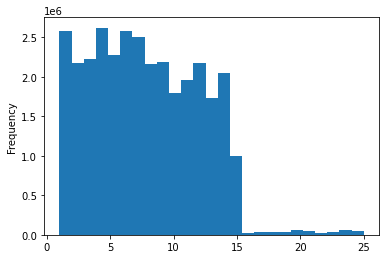

In [20]:
# Creating a histogram of item prices

hist = ords_prods_merge['prices'].plot.hist(bins = 25)

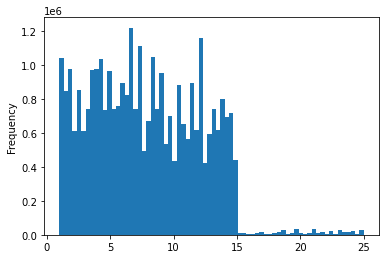

In [21]:
hist_2 = ords_prods_merge['prices'].plot.hist(bins = 70)

In [22]:
# Exporting the histogram

hist_2.figure.savefig(os.path.join(path, '04 Analysis', 'Visualizations', 'hist_price_freq.png'))

# 04. Sampling Data

In [23]:
# Create a list holding True/False values to the test np.random.rand() <= 0.7

np.random.seed(4)
dev = np.random.rand(len(ords_prods_merge)) <= 0.7

In [24]:
dev

array([False,  True, False, ...,  True,  True,  True])

In [25]:
np.random.rand(10)

array([0.14652875, 0.19185561, 0.99657905, 0.59139971, 0.45592832,
       0.56184089, 0.40007843, 0.31079573, 0.35588093, 0.63298758])

In [26]:
# Store 70% of the sample in the dataframe big

big = ords_prods_merge[dev]

In [27]:
# Store 30% of the sample in the dataframe small

small = ords_prods_merge[~dev]

In [28]:
len(ords_prods_merge)

32406041

In [29]:
len(big) + len(small)

32406041

# 05. Line Charts

In [30]:
# Creating a dataframe containing columns for the chart

df_2 = small[['order_day_of_week','prices']]

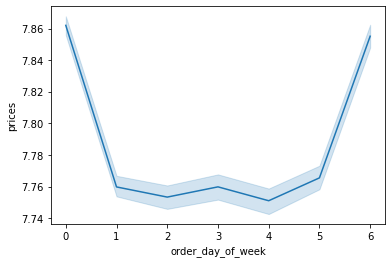

In [31]:
# Creating a line chart and making it an object 'line'

line = sns.lineplot(data = df_2, x = 'order_day_of_week', y = 'prices')

In [32]:
df_4 = ords_prods_merge[['order_day_of_week', 'prices']]

In [34]:
# Exporting the line chart

line.figure.savefig(os.path.join(path, '04 Analysis', 'Visualizations', 'line_order_dow_prices.png'))